<a href="https://colab.research.google.com/github/Jonathan06092006/Tareas-Computaci-n/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_excel(io.BytesIO(uploaded[file_name]), engine="openpyxl")
print(df.head())

Saving EXECUTION_USA.xlsx to EXECUTION_USA.xlsx
                  Date             Name  Age   Sex   Race   Crime  \
0           01/17/1977     Gary Gilmore   36  Male  White  Murder   
1           05/25/1979  John Spenkelink   30  Male  White  Murder   
2           10/22/1979     Jesse Bishop   46  Male  White  Murder   
3  1981-09-03 00:00:00      Steven Judy   24  Male  White  Murder   
4  1982-10-08 00:00:00    Frank Coppola   38  Male  White  Murder   

   Victim Count        Victim Sex Victim Race             County State  \
0             1              Male       White               Utah    UT   
1             1              Male       White               Leon    FL   
2             1              Male       White              Clark    NV   
3             4  2 Male, 2 Female       White             Marion    IN   
4             1              Male       White  Newport News City    VA   

    Region         Method Juvenile Volunteer Federal Foreign National  
0     West   Firing 

In [4]:
conteo = df.groupby("Race").size().reset_index(name="County")
conteo.sort_values("County", ascending=False)
print(conteo)

              Race  County
0            Asian       6
1            Black     495
2           Latino     120
3  Native American      16
4            Other       2
5            White     803


In [5]:
missings = df["County"].isnull().groupby(df["Race"]).sum()
missings.sort_values(ascending=False)

,County
Race,
Black,1
Latino,1
Asian,0
Native American,0
Other,0
White,0


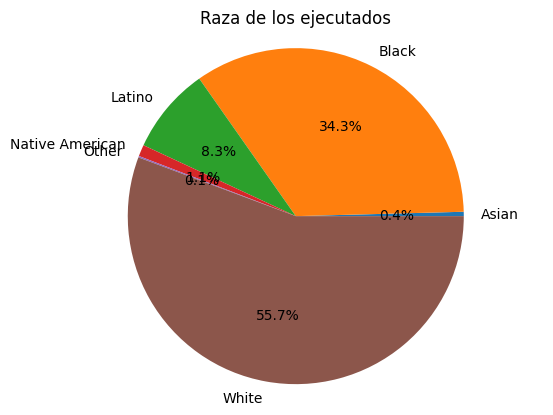

In [6]:
plt.pie(conteo["County"], labels=conteo["Race"], autopct='%0.1f%%')
plt.title("Raza de los ejecutados")
plt.axis("equal")#Para mejor despliegue de la grafica
plt.savefig("ejecuciones_pie.png", dpi=300, format="png")
plt.show()

In [7]:
conteo = df.groupby("Sex").size().reset_index(name="Date")
conteo.sort_values("Date", ascending=False)
print(conteo)

      Sex  Date
0  Female    16
1    Male  1426


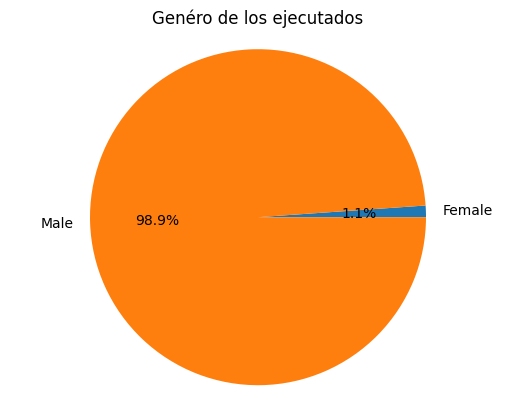

In [8]:
plt.pie(conteo["Date"], labels=conteo["Sex"], autopct='%0.1f%%')
plt.title("Genéro de los ejecutados")
plt.axis("equal")#Para mejor despliegue de la grafica
plt.savefig("ejecuciones_pie.png", dpi=300, format="png")
plt.show()

In [9]:
conteo = df.groupby("Age").size().reset_index(name="Sex")
conteo.sort_values("Sex", ascending=False)
print(conteo)

    Age  Sex
0    22    1
1    23    2
2    24    5
3    25   11
4    26   12
5    27   30
6    28   29
7    29   34
8    30   40
9    31   49
10   32   49
11   33   59
12   34   52
13   35   47
14   36   44
15   37   71
16   38   76
17   39   71
18   40   53
19   41   58
20   42   57
21   43   59
22   44   44
23   45   34
24   46   41
25   47   58
26   48   34
27   49   43
28   50   28
29   51   32
30   52   29
31   53   24
32   54   20
33   55   16
34   56   17
35   57   15
36   58   16
37   59   15
38   60    7
39   61   14
40   62   13
41   63   12
42   64    2
43   65    4
44   66    5
45   67    2
46   71    1
47   72    2
48   74    3
49   76    1
50   77    1


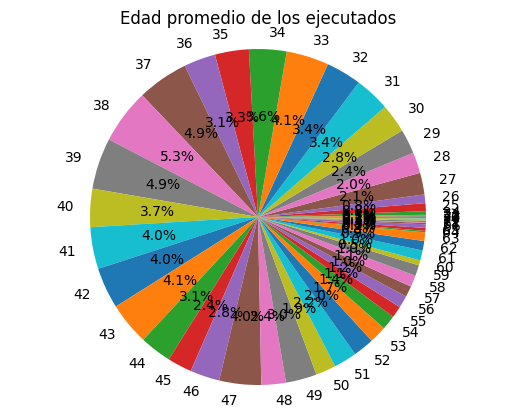

In [10]:
plt.pie(conteo["Sex"], labels=conteo["Age"], autopct='%0.1f%%')
plt.title("Edad promedio de los ejecutados")
plt.axis("equal")#Para mejor despliegue de la grafica
plt.savefig("ejecuciones_pie.png", dpi=300, format="png")
plt.show()

In [11]:
conteo = df.groupby("Victim Count").size().reset_index(name="Victim Sex")
conteo.sort_values("Victim Sex", ascending=False)
print(conteo)

    Victim Count  Victim Sex
0              1        1081
1              2         219
2              3          86
3              4          34
4              5          11
5              6           6
6              8           1
7              9           1
8             12           1
9             16           1
10           168           1


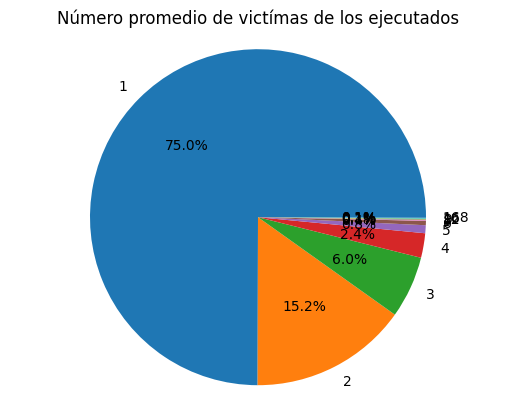

In [12]:
plt.pie(conteo["Victim Sex"], labels=conteo["Victim Count"], autopct='%0.1f%%')
plt.title("Número promedio de victímas de los ejecutados")
plt.axis("equal")#Para mejor despliegue de la grafica
plt.savefig("ejecuciones_pie.png", dpi=300, format="png")
plt.show()

In [13]:
conteo = df.groupby("Victim Sex").size().reset_index(name="Victim Count")
conteo.sort_values("Victim Count", ascending=False) #The error was here in set_index. So reset_index will make it into a dataframe
print(conteo)

           Victim Sex  Victim Count
0    1 Male, 1 Female           119
1    1 Male, 2 Female            25
2    1 Male, 3 Female             5
3    1 Male, 4 Female             5
4    1 Male, 5 Female             1
5    2 Male, 1 Female            27
6    2 Male, 2 Female             9
7    2 Male, 3 Female             3
8    3 Male, 1 Female            12
9    3 Male, 2 Female             1
10   3 Male, 3 Female             1
11   5 Male, 1 Female             2
12  6 Male, 10 Female             1
13   6 Male, 3 Female             1
14   7 Male, 2 Female             1
15             Female           593
16               Male           631


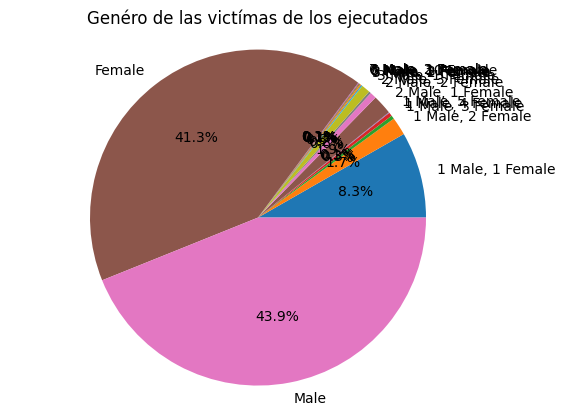

In [14]:
plt.pie(conteo["Victim Count"], labels=conteo["Victim Sex"], autopct='%0.1f%%')
plt.title("Genéro de las victímas de los ejecutados")
plt.axis("equal")#Para mejor despliegue de la grafica
plt.savefig("ejecuciones_pie.png", dpi=300, format="png")
plt.show()

In [15]:
conteo = df.groupby("Method").size().reset_index(name="Crime")
conteo.sort_values("Crime", ascending=False)
print(conteo)

             Method  Crime
0     Electrocution    158
1      Firing Squad      3
2       Gas Chamber     11
3           Hanging      3
4  Lethal Injection   1267


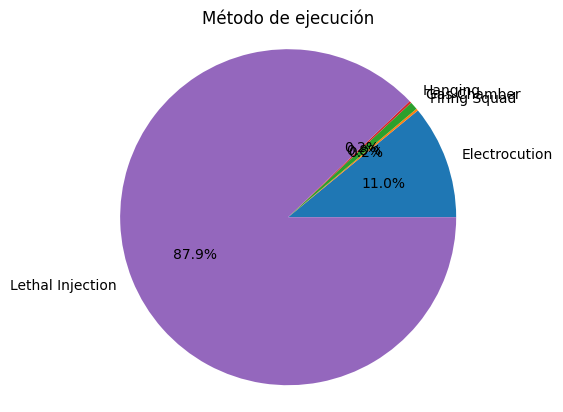

In [16]:
plt.pie(conteo["Crime"], labels=conteo["Method"], autopct='%0.1f%%')
plt.title("Método de ejecución")
plt.axis("equal")#Para mejor despliegue de la grafica
plt.savefig("ejecuciones_pie.png", dpi=300, format="png")
plt.show()

In [17]:
conteo = df.groupby("Region").size().reset_index(name="Crime")
conteo.sort_values("Crime", ascending=False)
print(conteo)

      Region  Crime
0    Midwest    178
1  Northeast      4
2      South   1175
3       West     85


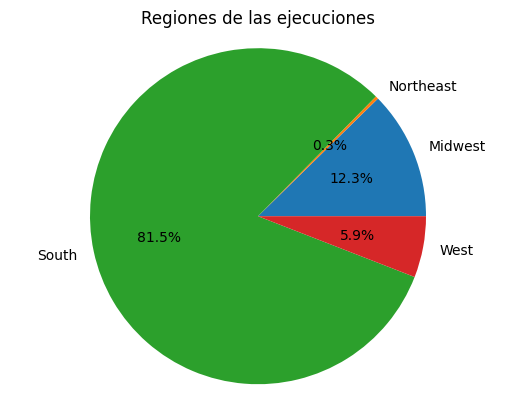

In [18]:
plt.pie(conteo["Crime"], labels=conteo["Region"], autopct='%0.1f%%')
plt.title("Regiones de las ejecuciones")
plt.axis("equal")#Para mejor despliegue de la grafica
plt.savefig("ejecuciones_pie.png", dpi=300, format="png")
plt.show()

In [19]:
conteo = df.groupby("Juvenile").size().reset_index(name="Crime")
conteo.sort_values("Crime", ascending=False)
print(conteo)

  Juvenile  Crime
0       No   1420
1      Yes     22


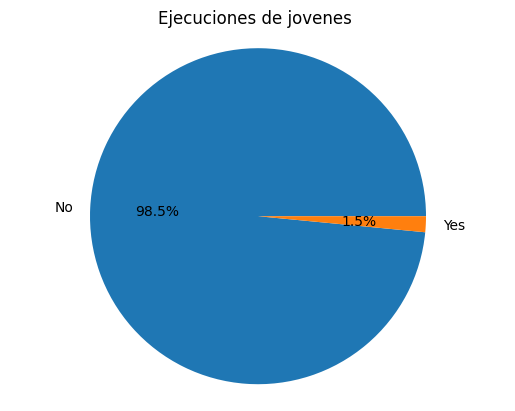

In [20]:
plt.pie(conteo["Crime"], labels=conteo["Juvenile"], autopct='%0.1f%%')
plt.title("Ejecuciones de jovenes ")
plt.axis("equal")#Para mejor despliegue de la grafica
plt.savefig("ejecuciones_pie.png", dpi=300, format="png")
plt.show()